In [38]:
# all import statements will go here
import pandas as pd
import numpy as np

In [39]:
# read in the csv of data and make sure it was imported correctly 
df = pd.read_csv('NFL.csv', header=[0])
df.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


In [40]:
# remove all players from the data set that are not drafted
df = df[df['Drafted..tm.rnd.yr.'].notna()]

# we need to add a column that classifies a player as a day 1,2, 3, player where NA means the player will not be drafted
df['Day_Drafted'] = 0

# now determine which day each player was drafted based on the roung they were drafted
for index, row in df.iterrows():
    tuple = row['Drafted..tm.rnd.yr.']
    tuple = tuple.split('/')
    tuple[1] = tuple[1].strip()
    if tuple[1] == '1st':
        df.loc[index, 'Day_Drafted'] = 1
        continue
    if tuple[1] == '2nd' or tuple[1] == '3rd':
        df.loc[index, 'Day_Drafted'] = 2
    else:
        df.loc[index, 'Day_Drafted'] = 3

In [41]:
# we will utilize median in order to fill in unavailable data 
# Because a lot of data is relative to the position the player plays, we will take the median of the players at their position 

# create dataframes for each position

# offensive line data frame
oline = df.loc[df['Position_Type'] == 'offensive_lineman']
dline = df.loc[df['Position_Type'] == 'defensive_lineman']
db = df.loc[df['Position_Type'] == 'defensive_back']
# the backs_receivers group is too broad, must use exact position in order to narrow down results
rb = df.loc[df['Position'] == 'RB']
lb = df.loc[df['Position_Type'] == 'line_backer']

# we are going to group WR and TE togehter because they are most similar 
wr = df.loc[df['Position'] == 'WR']
te = df.loc[df['Position'] == 'TE']

# merge the two data frames into one 
off_skill = pd.concat([wr, te, rb], axis=0)


# create list of all dataframe
dfs = [oline, dline, db, lb, off_skill]

# list of irrelevant columns for analysis
drop_cols = ['Year', 'Player', 'School', 'Drafted..tm.rnd.yr.', 'Player_Type', 'Position_Type', 'Position', 'Drafted']

# remove all irrelevant columns
for i in range(len(dfs)):
    for j in range(len(drop_cols)):
        dfs[i].drop(drop_cols[j], 1, inplace=True) 
        
oline.head()

/tmp/ipykernel_16861/3299842869.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfs[i].drop(drop_cols[j], 1, inplace=True)
/home/wavyj/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Day_Drafted
2,24.0,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,41.005821,3
5,23.0,1.9304,139.252858,5.28,NaN,29.0,NaN,NaN,NaN,37.368830,3
7,21.0,2.0320,140.160042,5.32,55.88,19.0,238.76,7.87,4.88,33.945078,3
12,22.0,1.9304,140.160042,5.16,77.47,21.0,261.62,7.81,4.60,37.612275,1
20,22.0,1.9050,138.345673,5.33,77.47,23.0,261.62,NaN,4.52,38.121995,2


In [42]:
# We will input all NaN values in the table 
# now we need to begin calculating the median value for each category in each position
# drop irrelevant attributes like bmi, school, etc. since we have already split up the data by position

# a list of all relevant attributes measured that impact draft position at the combine
attributes = ['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']

# get the median value of each position group for the columns specified above
# I can do this somewhat algorithmically 
for frame in dfs:
    for j in range(len(attributes)):
        tmp = frame.iloc[:, j-1]
        median = tmp.median(0, skipna=True)
        frame[attributes[j-1]] = frame[attributes[j-1]].fillna(median)

oline.head()

/tmp/ipykernel_16861/1972008941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[attributes[j-1]] = frame[attributes[j-1]].fillna(median)
/tmp/ipykernel_16861/1972008941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[attributes[j-1]] = frame[attributes[j-1]].fillna(median)
/tmp/ipykernel_16861/1972008941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Day_Drafted
2,24.0,2.0066,165.107623,5.50,71.12,21.0,259.08,7.77,4.72,41.005821,3
5,23.0,1.9304,139.252858,5.28,71.12,29.0,259.08,7.77,4.72,37.368830,3
7,21.0,2.0320,140.160042,5.32,55.88,19.0,238.76,7.87,4.88,33.945078,3
12,22.0,1.9304,140.160042,5.16,77.47,21.0,261.62,7.81,4.60,37.612275,1
20,22.0,1.9050,138.345673,5.33,77.47,23.0,261.62,7.77,4.52,38.121995,2


In [43]:
# split our data into test and train
from sklearn.model_selection import train_test_split

y = off_skill.loc[:,'Day_Drafted']

# drop irrelevant features
tmp = off_skill.drop(['Age', 'Day_Drafted'], axis=1)

# split theh data
X_train, X_test, y_train, y_test = train_test_split(tmp, y, test_size=.8)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc. transform(X_test)

# create classifier
knn = KNeighborsClassifier(n_neighbors=13)

# train the model using the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)


from sklearn import metrics
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.656
Accuracy: 0.5407554671968191


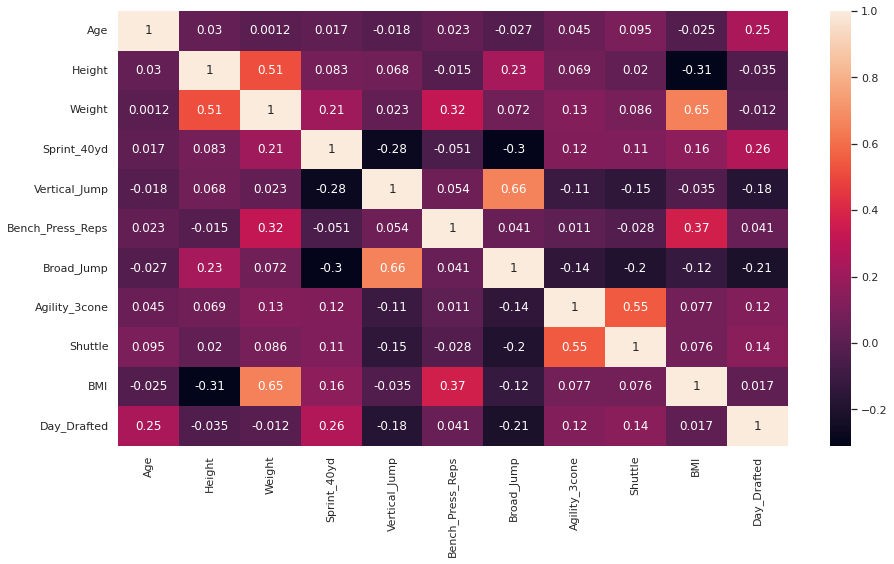

In [45]:
# create a heat map using seaborne to see feature correlation
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(rc= {'figure.figsize':(15,8)})
dataplot = sb.heatmap(db.corr(), annot=True)
plt.show()

In [46]:
# lets try again but utilizing correclations given in the heat map above
# we will try using the 5 most correlated features

tmp = db.drop(['Day_Drafted','Height', 'Weight', 'Vertical_Jump', 'Broad_Jump', 'Bench_Press_Reps'], axis=1)
y = db.loc[:,'Day_Drafted']
tmp.head()

,Age,Sprint_40yd,Agility_3cone,Shuttle,BMI
3,23.0,4.49,7.09,4.23,28.312463
9,22.0,4.44,6.93,4.16,25.970529
10,23.0,4.49,6.81,4.26,29.972681
15,23.0,4.35,6.77,4.10,25.683562
21,22.0,4.68,6.90,4.17,29.701103


In [47]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(tmp, y, test_size=.8)

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc. transform(X_test)

# create classifier
knn = KNeighborsClassifier(n_neighbors=13)

# train the model using the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)


from sklearn import metrics
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.5842696629213483
Accuracy: 0.5337078651685393


In [48]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(tmp, y, test_size=.8)

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# create classifier
knn = KNeighborsClassifier(n_neighbors=13)

# train the model using the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)


from sklearn import metrics
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.550561797752809
Accuracy: 0.4691011235955056


[21, 170, 165]
[48, 106, 202]


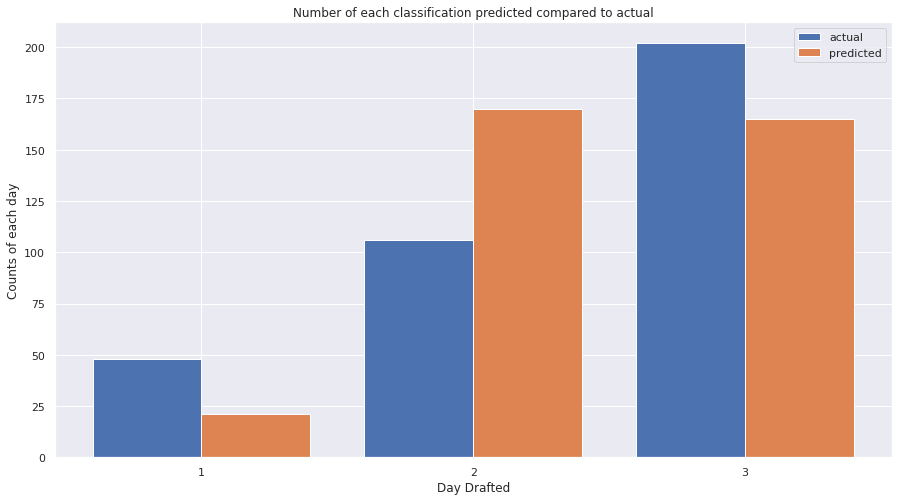

In [49]:
# lets graph our different accuracies
# we will use our training set to graph accuracy because this has more data, which typically leads to better results in KNN

# count values of day 1 2 3 in thid predict 

X = ['1', '2', '3']

# find number of actual day 1 2 3 picks for the data we picked
actual_counts = y_test.value_counts()
actual = []
for i in range(3):
    actual.append(actual_counts.get(i+1))


# calculate the number of each group we predicted 
(unique, predicted) = np.unique(y_pred, return_counts=True)

pred = []
for val in predicted:
    pred.append(val)


# graph the results on a bar graph
X_axis = np.arange(len(X))
plt.bar(X_axis - .2, actual, .4, label ='actual')
plt.bar(X_axis + .2, pred, .4, label='predicted')
plt.xticks(X_axis, X)
plt.xlabel("Day Drafted")
plt.ylabel("Counts of each day")
plt.title("Number of each classification predicted compared to actual")
plt.legend()
plt.show()

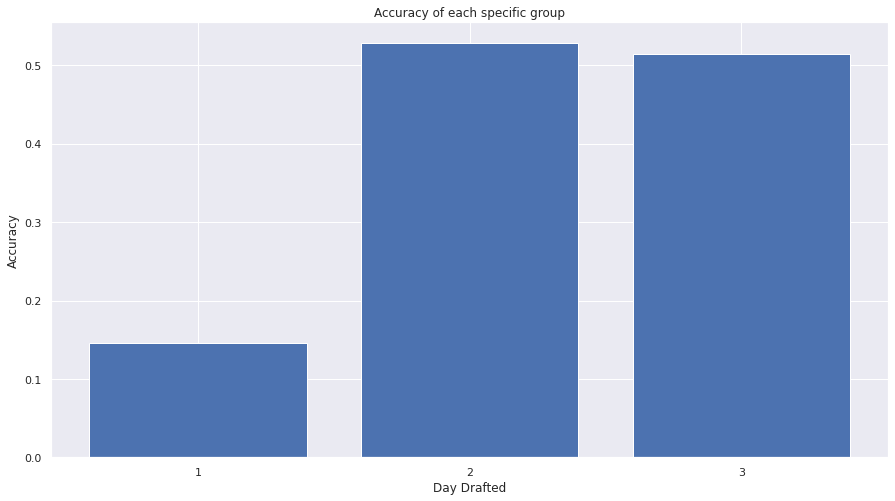

In [50]:
# now lets show a graph of the accuracy per draft group when it comes to actually classifying individuals

accuracy = []
correct = [0, 0, 0]
totals = [0, 0, 0]

pred = y_pred
actual = np.array(y_test)

for i in range(len(pred)):
    if pred[i] == actual[i]:
        if pred[i] == 1:
            correct[0] += 1
            totals[0] += 1
        if pred[i] == 2:
            correct[1] += 1
            totals[1] += 1
        if pred[i] == 3:
            correct[2] += 1
            totals[2] += 1
    else:
        if actual[i] == 1:
            totals[0] += 1
        if actual[i] == 2:
            totals[1] += 1
        if actual[i] == 3:
            totals[2] += 1


for i in range(3):
    accuracy.append(correct[i] / totals[i])
    
    
X_axis = np.arange(len(X))
plt.bar(X_axis, accuracy)
plt.xticks(X_axis, X)
plt.xlabel("Day Drafted")
plt.ylabel("Accuracy")
plt.title("Accuracy of each specific group")
plt.show()

Summary of all the data above:

We first split the data into position groups who's data will be most similar because they are going into the NFL at the same position, so when the data is normalized it will be between 